### **Objetivo do case**

 Vamos explorar os dados com foco na saúde, usando técnicas visuais para ter uma compreensão mais ampla dos padrões e tendências ligados ao bem-estar. Utilizaremos o Python para facilitar a extração e visualização de dados, fazendo uso dos pacotes Pandas, Matplotlib e Seaborn. Essas ferramentas serão fundamentais para extrair insights e criar representações visuais que tornem as informações mais compreensíveis durante o processo de análise.


### **Importação dos dados e Biblíoteca**
Todos os dados utilizados neste contexto foram adquiridos a partir do Kaggle. 


In [2]:
#Biblioteca para manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas para Exploração de Dados 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Carregando conjunto de dados em formato csv
saude_df = pd.read_csv('heart_data.csv')

### **Análise Inicial e Preparação do Dataset**

Antes de iniciar qualquer análise, é crucial verificar se a formatação dos dados está conforme desejado. Vamos certificar que o dataframe esteja corretamente formatado, a fim de garantir a precisão e consistência necessárias para a análise que será realizada.



In [4]:
#Explorando o conjunto de dados
print("Quantidade de linhas:", saude_df.shape[0])
print("Quantidade de colunas:", saude_df.shape[1])

#Verificando as primeiras e últimas linhas 
display(saude_df.head())
display(saude_df.tail())



Quantidade de linhas: 70000
Quantidade de colunas: 14


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
#Verificando se há dados duplicados no dataframe
saude_df.duplicated().sum()

0

Após verificar toda a tabela do nosso dataset, integraremos um glossário para facilitar a compreensão.

**Segue a relação das colunas que compõem o conjunto de dados referente ao DF Saúde.**

- id - número de identificação para identificar uma pessoa de forma única.
- age- idade
- gender- gênero
- height- altura
- weight - peso
- ap_hi - pressão arterial sistólica
- ap_lo - pressão arterial
- cholesterol - colesterol
- gluc - glicose
- smoke - fumante
- lco- Consumo de alcool
- ctive - hábitos de atividade física/estilo de vida saudável
- cardio - doenças cardiovasculares


### **Elaborando a Tabela de Índice de Massa Corporal (IMC)** ###

Neste momento, estou prestes a incluir uma nova coluna no conjunto de dados, focada no Índice de Massa Corporal (IMC). A principal razão por trás dessa adição é oferecer uma análise mais abrangente da saúde e bem-estar dos indivíduos representados nos dados.

O IMC, sendo uma métrica amplamente reconhecida, estabelece uma relação entre o peso e a altura de uma pessoa. Essa inclusão visa fornecer insights sobre a composição corporal dos participantes, o que, por sua vez, pode revelar possíveis indicadores de saúde.

Ao introduzir essa nova coluna, a intenção é enriquecer a análise geral, permitindo a identificação de padrões ou tendências associadas ao IMC. Esta medida é comumente empregada em estudos relacionados à saúde e nutrição, proporcionando uma compreensão mais profunda das características físicas dos participantes. Dessa forma, contribui para uma análise mais completa e embasada dos dados em consideração.

In [6]:
# Criando coluna de IMC
saude_df['IMC'] = 10000*saude_df['weight']/(saude_df['height']*saude_df['height'])

In [7]:
%%timeit

condicoes = [
    (saude_df['IMC'] < 18.5),
    ((saude_df['IMC'] >= 18.5) & (saude_df['IMC']< 25)),
    ((saude_df['IMC'] >= 25) & (saude_df['IMC']< 30)),
    (saude_df['IMC'] >= 30) 

]

classificacao = ['baixo_peso', 'normal', 'sobrepeso', 'obesidade']
saude_df['class_imc'] = np.select(condicoes, classificacao, default=np.nan)

23.7 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Vamos modificar o nome do conjunto de dados para torná-lo mais compreensível e acessível ao público em geral, de modo que todos possam compreender facilmente o conteúdo.

In [8]:
#Organizando e renomenando colunas/linhas Dataframe
saude_df['gender'] = saude_df['gender'].replace(1, 'H')
saude_df['gender'] = saude_df['gender'].replace(2, 'M')

In [9]:
saude_df.rename(columns={'age' : 'idade'}, inplace=True)
saude_df.rename(columns={'gender' : 'genero'}, inplace=True)
saude_df.rename(columns={'height' : 'altura'}, inplace=True)
saude_df.rename(columns={'weight' : 'peso'}, inplace=True)
saude_df.rename(columns={'cholesterol' : 'colesterol'}, inplace=True)
saude_df.rename(columns={'gluc' : 'glicemia'}, inplace=True)
saude_df.rename(columns={'smoke' : 'fumante'}, inplace=True)
saude_df.rename(columns={'alco' : 'alcool'}, inplace=True)


In [10]:
saude_df['idade'] = [row // 1000 for row in saude_df['idade']]

In [11]:
#Explorando o conjunto de dados novamente
saude_df.head()

,index,id,idade,genero,altura,peso,ap_hi,ap_lo,colesterol,glicemia,fumante,alcool,active,cardio,IMC,class_imc
0,0,0,18,M,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal
1,1,1,20,H,156,85.0,140,90,3,1,0,0,1,1,34.927679,obesidade
2,2,2,18,H,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal
3,3,3,17,M,169,82.0,150,100,1,1,0,0,1,1,28.710479,sobrepeso
4,4,4,17,H,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal


In [12]:
# Examinando os tipos dos dados
saude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       70000 non-null  int64  
 1   id          70000 non-null  int64  
 2   idade       70000 non-null  int64  
 3   genero      70000 non-null  object 
 4   altura      70000 non-null  int64  
 5   peso        70000 non-null  float64
 6   ap_hi       70000 non-null  int64  
 7   ap_lo       70000 non-null  int64  
 8   colesterol  70000 non-null  int64  
 9   glicemia    70000 non-null  int64  
 10  fumante     70000 non-null  int64  
 11  alcool      70000 non-null  int64  
 12  active      70000 non-null  int64  
 13  cardio      70000 non-null  int64  
 14  IMC         70000 non-null  float64
 15  class_imc   70000 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


In [13]:
#Resumo Estátisticos 
saude_df.describe

<bound method NDFrame.describe of        index     id  idade genero  altura   peso  ap_hi  ap_lo  colesterol  \
0          0      0     18      M     168   62.0    110     80           1   
1          1      1     20      H     156   85.0    140     90           3   
2          2      2     18      H     165   64.0    130     70           3   
3          3      3     17      M     169   82.0    150    100           1   
4          4      4     17      H     156   56.0    100     60           1   
...      ...    ...    ...    ...     ...    ...    ...    ...         ...   
69995  69995  99993     19      M     168   76.0    120     80           1   
69996  69996  99995     22      H     158  126.0    140     90           2   
69997  69997  99996     19      M     183  105.0    180     90           3   
69998  69998  99998     22      H     163   72.0    135     80           1   
69999  69999  99999     20      H     170   72.0    120     80           2   

       glicemia  fumante  alc

In [14]:
#Será que a distribuição é maior no sexo masculino ou no sexo feminino?
saude_df['genero'].value_counts()

genero
H    45530
M    24470
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\269287742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genero', data=saude_df, palette='viridis')


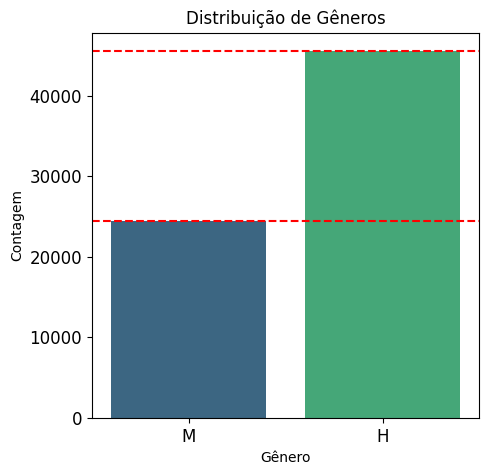

In [15]:
#Qual é o gênero mais predominante na amostra?
plt.figure(figsize=(5, 5))
genero_ref = [45530, 24470]
for genero in genero_ref:
    plt.axhline(y=genero, color='red', linestyle='--', label=f'Ref {genero}')
sns.countplot(x='genero', data=saude_df, palette='viridis')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de Gêneros')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [16]:
#Qual é a faixa etária predominante entre os usuários?
#Podemos observar que a faixa etária mais predominante está entre 18  21 anos.
saude_df['idade'].value_counts()

idade
21    11521
19    10343
18    10147
20     8490
22     6390
16     5659
23     4923
15     4751
17     4368
14     3404
10        4
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\3243254437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='idade', data=saude_df, palette='viridis')


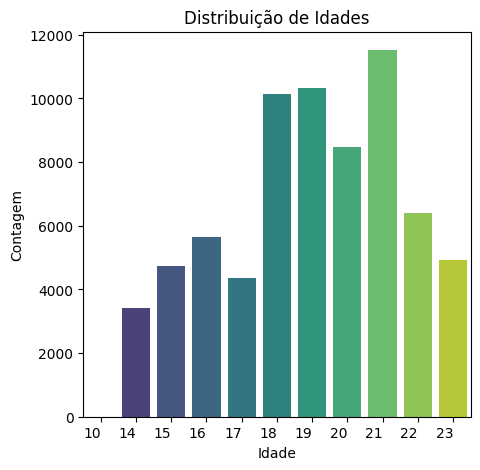

In [17]:
#Qual é a faixa etária predominante entre os usuários?
#Podemos observar que a faixa etária mais predominante está entre 18  21 anos.
plt.figure(figsize=(5, 5))
sns.countplot(x='idade', data=saude_df, palette='viridis')
plt.xticks(rotation=0, ha='right')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idades')
plt.show()


In [18]:
saude_df['idade'].value_counts()

idade
21    11521
19    10343
18    10147
20     8490
22     6390
16     5659
23     4923
15     4751
17     4368
14     3404
10        4
Name: count, dtype: int64

In [19]:
saude_df['idade'].describe()

count    70000.000000
mean        18.978200
std          2.480826
min         10.000000
25%         17.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: idade, dtype: float64

In [20]:
#Qual faixa etária é mais comum em cada gênero entre os usuários?
saude_df.groupby('genero')['idade'].value_counts()

genero  idade
H       21       7685
        19       6893
        18       6836
        20       5751
        22       4025
        16       3428
        23       3168
        15       2926
        17       2656
        14       2159
        10          3
M       21       3836
        19       3450
        18       3311
        20       2739
        22       2365
        16       2231
        15       1825
        23       1755
        17       1712
        14       1245
        10          1
Name: count, dtype: int64

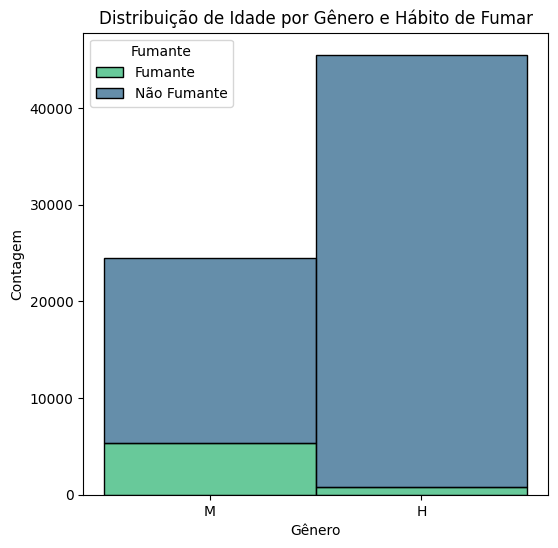

In [21]:
#Qual gênero apresenta a taxa mais alta de tabagismo?
plt.figure(figsize=(6, 6))
sns.histplot(data=saude_df, x="genero", hue="fumante", multiple='stack',palette="viridis", bins=15)
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Distribuição de Idade por Gênero e Hábito de Fumar")
plt.legend(title="Fumante", labels=["Fumante", "Não Fumante"])
plt.show()

In [22]:
saude_df.groupby('genero')['fumante'].value_counts()

genero  fumante
H       0          44717
        1            813
M       0          19114
        1           5356
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\4171854439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_imc', data=saude_df, palette='viridis')


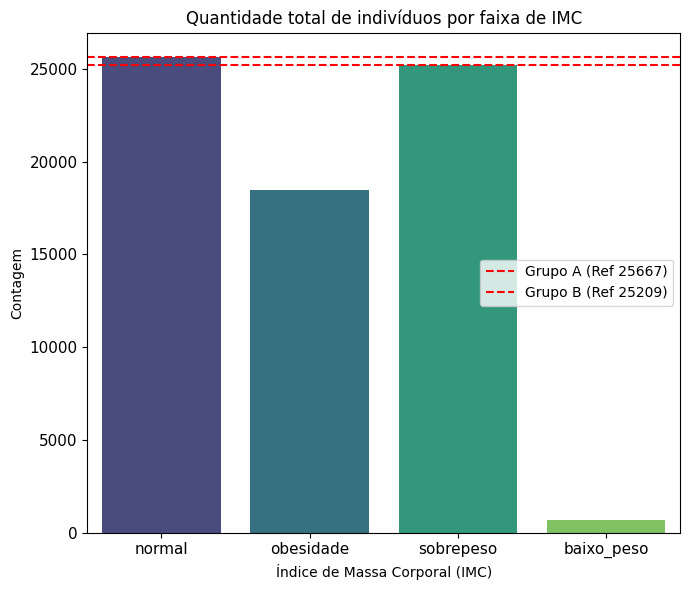

In [23]:
#Qual é a categoria de Índice de Massa Corporal (IMC) com o maior número de ocorrências?
plt.figure(figsize=(7, 6))
sns.countplot(x='class_imc', data=saude_df, palette='viridis')
grupos_ref = {'Grupo A': 25667, 'Grupo B': 25209}
for grupo, valor in grupos_ref.items():
    plt.axhline(y=valor, color='red', linestyle='--', label=f'{grupo} (Ref {valor})')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Contagem')
plt.title('Quantidade total de indivíduos por faixa de IMC')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.legend()
plt.show()


In [24]:
saude_df['class_imc'].value_counts()

class_imc
normal        25667
sobrepeso     25209
obesidade     18474
baixo_peso      650
Name: count, dtype: int64

In [25]:
soma_class = saude_df.groupby('class_imc')['fumante'].sum().reset_index()
soma_class = soma_class.sort_values(by='fumante', ascending=False)
print(soma_class)

    class_imc  fumante
3   sobrepeso     2458
1      normal     2259
2   obesidade     1379
0  baixo_peso       73


In [26]:
#Em que faixa etária e classe de gênero o tabagismo é mais prevalente?
soma_grupo = saude_df.groupby(['class_imc', 'idade', 'genero'])['fumante'].sum().reset_index()
soma_grupo = soma_grupo.sort_values(by='fumante', ascending=False)
soma_grupo.head(5)

,class_imc,idade,genero,fumante
73,sobrepeso,19,M,326
77,sobrepeso,21,M,323
30,normal,18,M,302
71,sobrepeso,18,M,299
32,normal,19,M,276


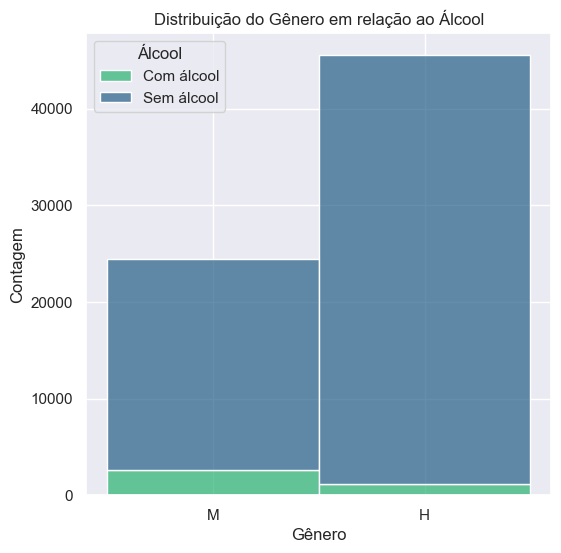

In [27]:
#Qual gênero apresenta níveis mais elevados de álcool no organismo?
sns.set_theme()
saude_df['genero'] = saude_df['genero'].astype(str)
generos_total = saude_df['genero'].unique()
plt.figure(figsize=(6, 6))
sns.histplot(data=saude_df, x="genero", hue="alcool", multiple='stack',palette="viridis", bins=20)
plt.xticks(range(len(generos_total)), generos_total)
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Distribuição do Gênero em relação ao Álcool")
plt.legend(title="Álcool", labels=["Com álcool", "Sem álcool"])

plt.show()



In [28]:
saude_df.groupby('genero')['alcool'].value_counts()

genero  alcool
H       0         44369
        1          1161
M       0         21867
        1          2603
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

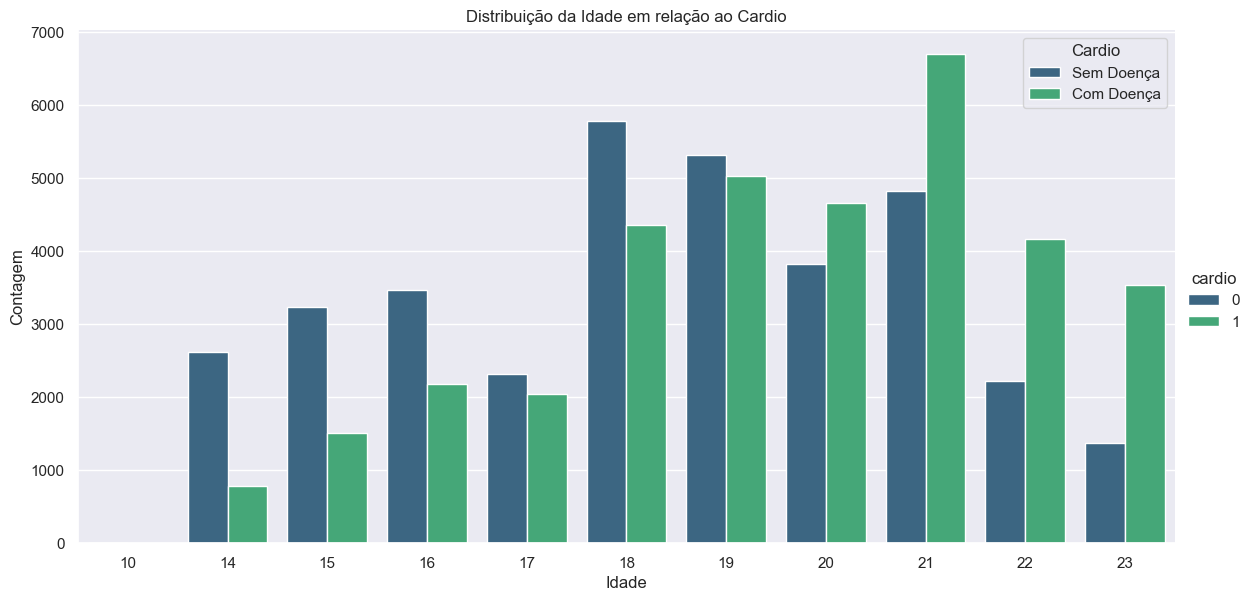

In [29]:
#Distribuição da idade em relação a Cardio
sns.set_theme()
saude_df.sort_values(by='idade', inplace=True)
plt.figure(figsize=(12, 8))
sns.catplot(x="idade", hue="cardio", data=saude_df, kind="count", height=6, aspect=2, palette="viridis")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Distribuição da Idade em relação ao Cardio")
plt.legend(title="Cardio", labels=["Sem Doença", "Com Doença"])
plt.show()


In [30]:
saude_df.groupby('idade')['cardio'].value_counts()

idade  cardio
10     0            4
14     0         2624
       1          780
15     0         3243
       1         1508
16     0         3472
       1         2187
17     0         2322
       1         2046
18     0         5780
       1         4367
19     0         5317
       1         5026
20     1         4660
       0         3830
21     1         6698
       0         4823
22     1         4163
       0         2227
23     1         3544
       0         1379
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\389212395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='glicemia', data=saude_df, palette='viridis')


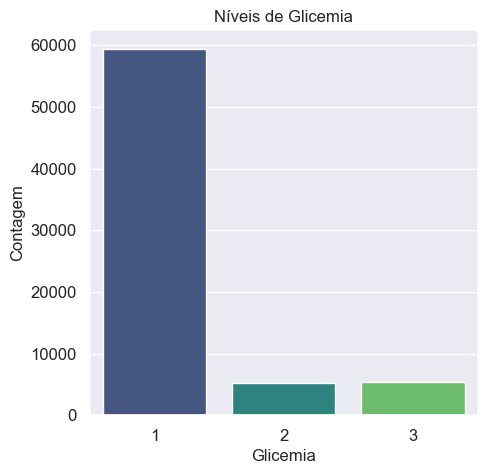

In [31]:
#Níveis de Glicemia
plt.figure(figsize=(5, 5))
sns.countplot(x='glicemia', data=saude_df, palette='viridis')
plt.xlabel('Glicemia')
plt.ylabel('Contagem')
plt.title('Níveis de Glicemia')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:
saude_df.groupby('genero')['glicemia'].value_counts()

genero  glicemia
H       1           38471
        3            3643
        2            3416
M       1           21008
        2            1774
        3            1688
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\1086605716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='colesterol', data=saude_df, palette='viridis')


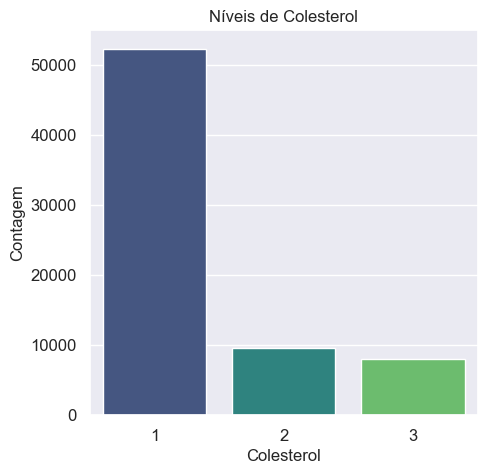

In [33]:
#Níveis de colesterol 
plt.figure(figsize=(5, 5))
sns.countplot(x='colesterol', data=saude_df, palette='viridis')
plt.xlabel('Colesterol')
plt.ylabel('Contagem')
plt.title('Níveis de Colesterol')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
saude_df.groupby('genero')['colesterol'].value_counts()

genero  colesterol
H       1             33570
        2              6403
        3              5557
M       1             18815
        2              3146
        3              2509
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\1335947956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude_df['peso'])


<Axes: xlabel='peso', ylabel='Density'>

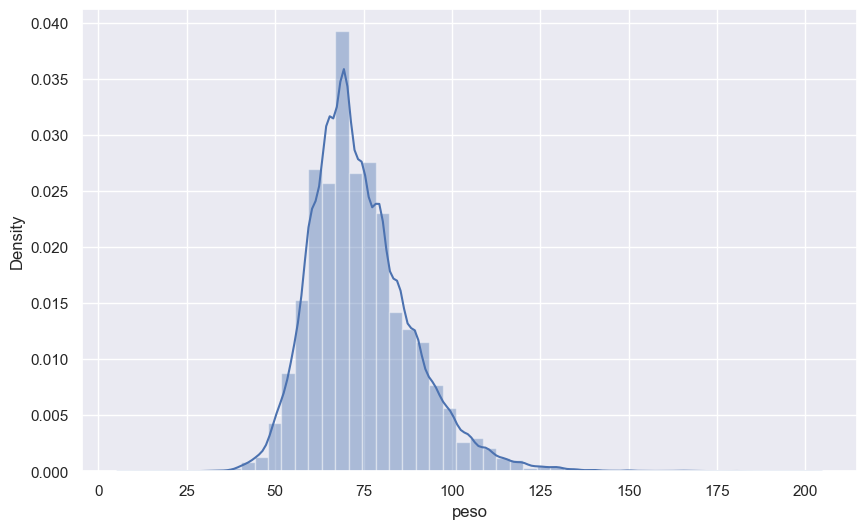

In [35]:
fig = plt.figure(figsize=(10,6))
sns.distplot(saude_df['peso'])

In [36]:
saude_df['peso'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: peso, dtype: float64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_5732\451101317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude_df['altura'])


<Axes: xlabel='altura', ylabel='Density'>

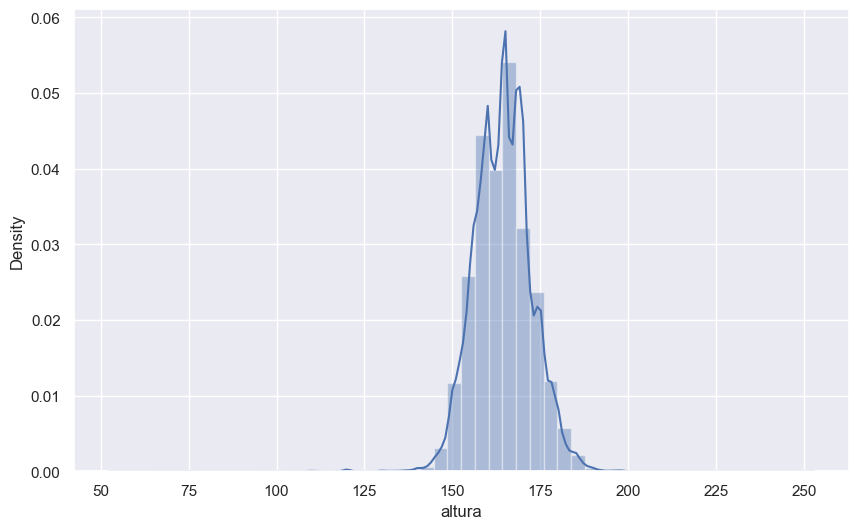

In [37]:
fig = plt.figure(figsize=(10,6))
sns.distplot(saude_df['altura'])

In [38]:
saude_df['altura'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: altura, dtype: float64

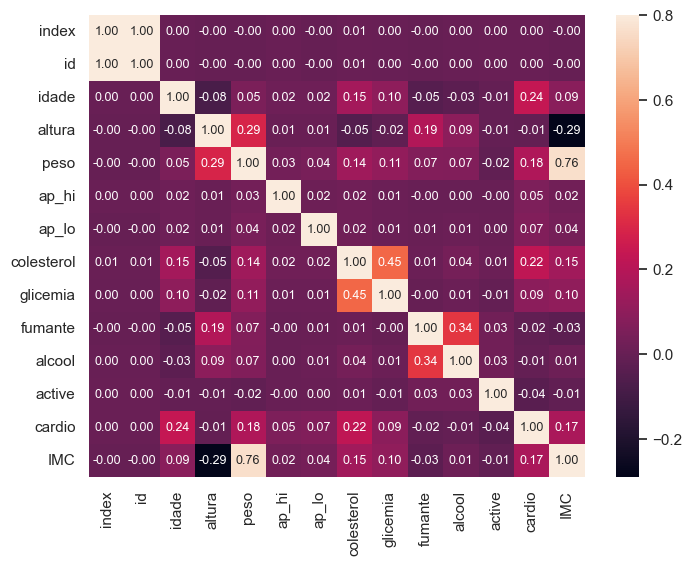

In [39]:
#Gerando uma tabela de correlação que ilustra as conexões e dependências entre as variáveis em nosso conjunto de dados.
saude_corr = saude_df.select_dtypes(include=[float, int]).columns
saude_corr = saude_df[saude_corr].corr()
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(saude_corr, vmax=0.8, annot_kws={'size': 9}, annot=True, fmt='.2f')
plt.show()
